<a href="https://colab.research.google.com/github/amzangi/datascience-bootcamp/blob/master/3b_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Resampling, Shifting, and Windowing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from pandas_datareader import data

## Google's data from Yahoo Finance
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [2]:
goog = goog['Close']

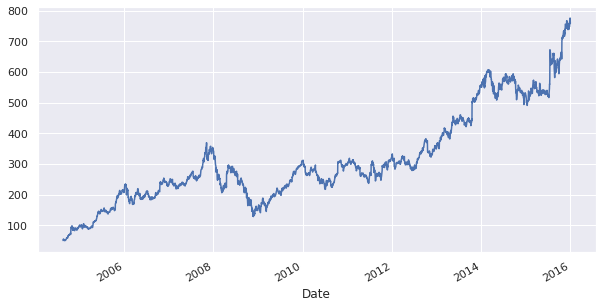

In [3]:
%matplotlib inline
seaborn.set()
goog.plot(figsize=(10,5));

#### Resampling and converting frequencies

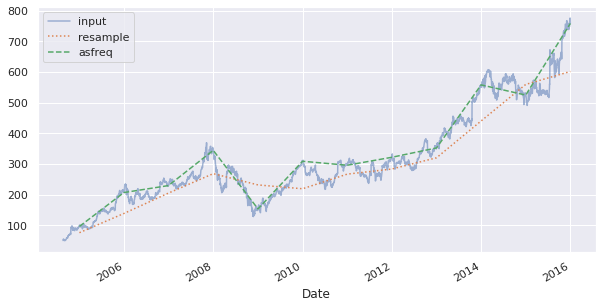

In [4]:
goog.plot(alpha = 0.5, style = '-', figsize=(10,5))
# BA is for end of business year
goog.resample('BA').mean().plot(style=':') # resample() is fundamentally a data aggregation
goog.asfreq('BA').plot(style = '--') # asfreq() is fundamentally a data selection
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

#Notice the difference: at each point, resample reports the average of the previous year, while asfreq reports the value at the end of the year.

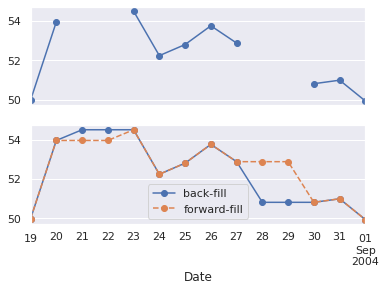

In [5]:
# Dealing with NA values in asfreq
fig1, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]


data.asfreq('D').plot(ax=ax[0], marker='o') # top graph

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o') # bottom graph
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o') # bottom graph

ax[1].legend(["back-fill", "forward-fill"]);

#### Time-shifts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


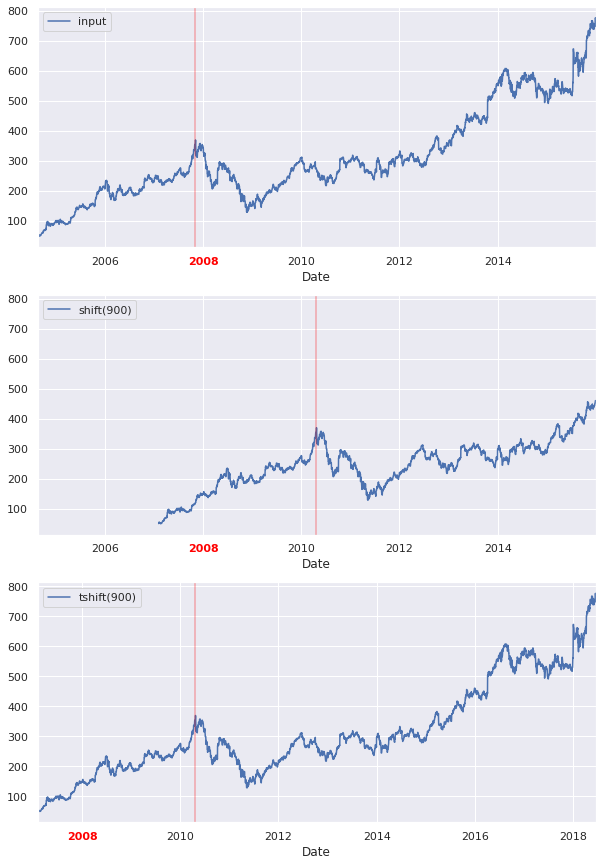

In [6]:
fig2, ax2 = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax2[0]) # top graph
goog.shift(900).plot(ax=ax2[1]) # middle graph, shifts the data
goog.tshift(900).plot(ax=ax2[2]) # bottom graph, shifts the index

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')


ax2[0].legend(['input'], loc=2) # loc is location of the legend.
ax2[0].get_xticklabels()[2].set(weight='heavy', color='red') # 2 corresponds to 2nd tick at x-axis
ax2[0].axvline(local_max, alpha=0.3, color='red')

ax2[1].legend(['shift(900)'], loc=2)
ax2[1].get_xticklabels()[2].set(weight='heavy', color='red') # 2 corresponds to 2rd tick at x-axis
ax2[1].axvline(local_max + offset, alpha=0.3, color='red')

ax2[2].legend(['tshift(900)'], loc=2)
ax2[2].get_xticklabels()[1].set(weight='heavy', color='red') # 1 corresponds to first tick at x-axis
ax2[2].axvline(local_max + offset, alpha=0.3, color='red')

fig2.set_figheight(15)
fig2.set_figwidth(10)
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


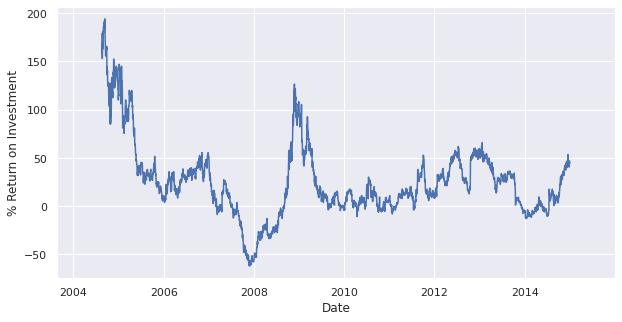

In [7]:
# using shifted values to compute the one-year return on Google stock
ROI = 100 * (goog.tshift(-365) / goog - 1)

ROI.plot(figsize=(10,5))
plt.ylabel('% Return on Investment');

#### Rolling Windows

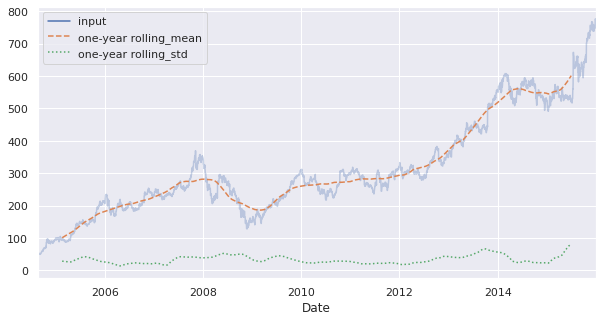

In [8]:
rolling = goog.rolling(365, center=True)

x42 = pd.DataFrame({'input':goog,
                   'one-year rolling_mean': rolling.mean(),
                   'one-year rolling_std': rolling.std()})

ax = x42.plot(style = ['-', '--', ':'], figsize=(10,5))
ax.lines[0].set_alpha(0.3) # Matplotlib allows you to adjust the transparency of a graph plot using the alpha attribute.

#### Example: Visualizing Seattle Bicycle Counts

In [9]:
# 1. dowloaded data from https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k
# 2. Upload to CONTENT folder on the right. Right clicking will show the option for UPLOAD.

In [12]:
import pandas as pd
x43 = pd.read_csv('/content/Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)

x43.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [13]:
x43.columns = ['Total','West', 'East'] # reNaming 3 columns
x43.dropna().describe()

,Total,West,East
count,138521.000000,138521.000000,138521.000000
mean,112.147025,51.104800,61.042225
std,142.887838,65.881672,88.902702
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


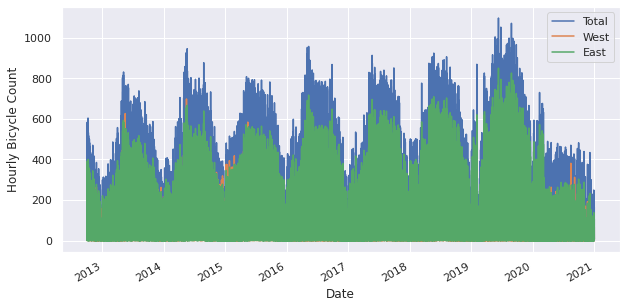

In [14]:
#matplotlib inline
import seaborn; seaborn.set()

x43.plot(figsize = (10,5))
plt.ylabel('Hourly Bicycle Count');

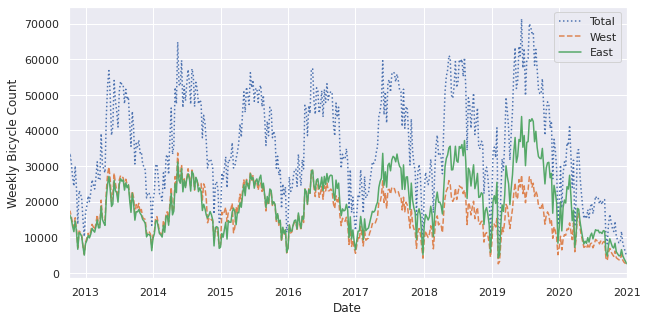

In [15]:
x43_weekly = x43.resample('W').sum() # resampling Weekly
x43_weekly.plot(style = [':', '--', '-'], figsize = (10,5))
plt.ylabel('Weekly Bicycle Count');

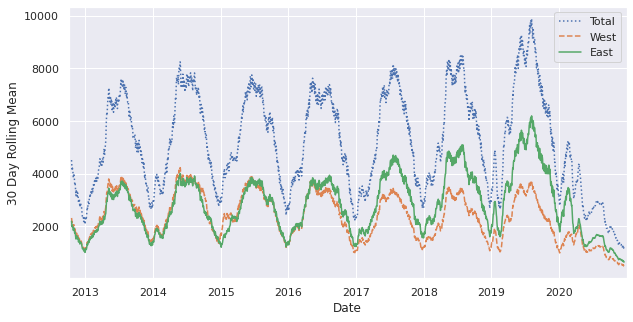

In [16]:
x43_daily = x43.resample('D').sum() # resampling Daily
x43_daily.rolling(30, center=True).mean().plot(style = [':', '--', '-'], figsize = (10,5)) # 30 Day Rolling Mean
plt.ylabel('30 Day Rolling Mean');

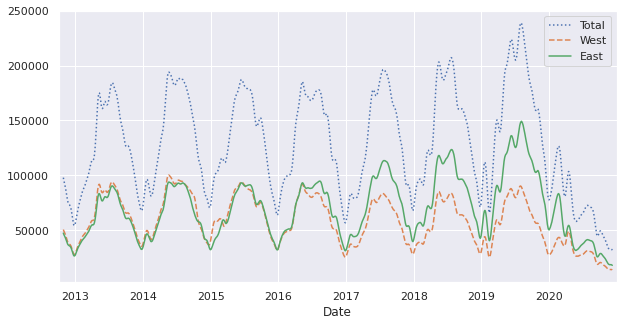

In [17]:
# Lets try removing jaggedness of the plot using window function
x43_daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style = [':', '--', '-'], figsize = (10,5));


#### Digging into Data

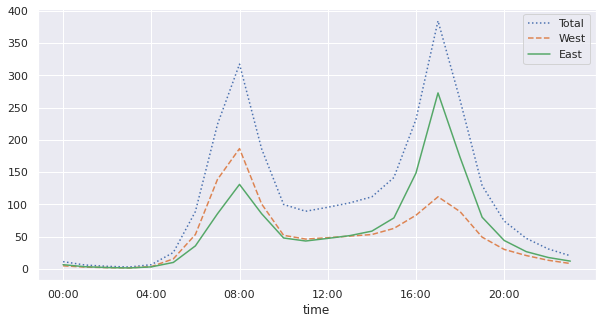

In [18]:
# Looking into average Traffic as a funciton of time of day

x43_by_time = x43.groupby(x43.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6) # array([    0, 14400, 28800, 43200, 57600, 72000])
x43_by_time.plot(xticks=hourly_ticks, style = [':', '--', '-'], figsize = (10,5));

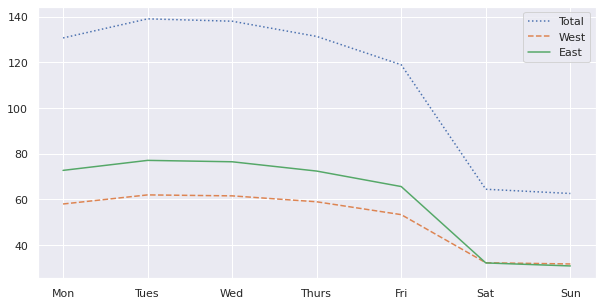

In [19]:
# Looking into average Traffic as a funciton of day of the week

x43_by_weekday = x43.groupby(x43.index.dayofweek).mean()
x43_by_weekday.index=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
x43_by_weekday.plot(style = [':', '--', '-'], figsize = (10,5));

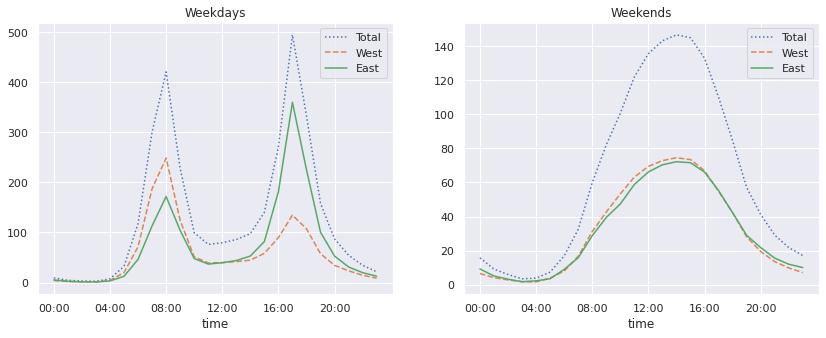

In [20]:
# Lets look into Hourly trend on weekdays versus weekends
x43_weekend = np.where(x43.index.weekday < 5, 'Weekday', 'Weekend')
x43_weekend_bytime = x43.groupby([x43_weekend, x43.index.time]).mean()

fig, bx = plt.subplots(1, 2, figsize=(14,5))

x43_weekend_bytime.loc['Weekday'].plot(ax=bx[0], title='Weekdays', xticks=hourly_ticks, style = [':', '--', '-'])
x43_weekend_bytime.loc['Weekend'].plot(ax=bx[1], title='Weekends', xticks=hourly_ticks, style = [':', '--', '-']);

# we see a bimodal pattern during weekdaysm, but unimodal patter during Weekends.

#### Query() and Eval()

In [21]:
# numpy and pandas support fast vectorized operations
import numpy as np
rng = np.random.RandomState(42)
x44 = rng.rand(int(1E6))
y44 = rng.rand(int(1E6))
%timeit x44 + y44

100 loops, best of 5: 1.83 ms per loop


In [25]:
# fast numpy computation
%timeit np.fromiter((xi + yi for xi, yi in zip(x44, y44)), dtype=x44.dtype, count=len(x44))
# zip join two tuples, while fromiter creates a ndarray by using an iterable object.

1 loop, best of 5: 343 ms per loop


But it is not fast when you are computing compound expressions. 
For example, `mask = (x > 0.5) & (y < 0.5)`  will be treated as 
`mask = tmp1 & tmp2` where 
> `tmp1 = (x > 0.5)` and `tmp2 = (y < 0.5)` 

`tmp1` and `tmp2` are temporary arrays 

In [28]:
# The Numexpr lib has the ability to compute compound expression element by element, without the need to allocate full intermediate arrays.
# Numexpr accepts a string giving the NumPy-style expression you’d like to compute

import numexpr
mask = (x44 > 0.5) & (y44 < 0.5)
mask_numexpr = numexpr.evaluate('(x44 > 0.5) & (y44 < 0.5)')
np.allclose(mask, mask_numexpr) # Returns True if two arrays are element-wise equal within a tolerance.

True

#### pandas.eval() for Efficient Operations, it depends on Numexpr package.

In [29]:
import pandas as pd
nrows, ncols = 100000, 100
df11, df22, df33, df44 = (pd.DataFrame(rng.rand(nrows, ncols)) for i in range(4))

# Summing of all four DataFrames using the typical Pandas approach.
%timeit df11 + df22 + df33 + df44

10 loops, best of 5: 59.7 ms per loop


In [30]:
#  Summing of all four DataFrames using pd.eval is much faster
%timeit pd.eval('df11 + df22 + df33 + df44')

10 loops, best of 5: 40.1 ms per loop


In [31]:
np.allclose(df11 + df22 + df33 + df44, pd.eval('df11 + df22 + df33 + df44'))

True

#### Operations supported by pd.eval()

In [32]:
# Creating 5 dataframes
df11, df22, df33, df44, df55 = (pd.DataFrame(rng.randint(0, 1000, (100, 3))) for i in range(5))

In [33]:
# Arithmetic operators
result1 = -df11 * df22 / (df33 + df44) - df55
result2 = pd.eval('-df11 * df22 / (df33 + df44) - df55')
np.allclose(result1, result2)

True

In [34]:
# Comparison operators
result1 = (df11 < df22) & (df22 <= df33) & (df33 != df44)
result2 = pd.eval('df11 < df22 <= df33 != df44')
np.allclose(result1, result2)

True

In [35]:
# Bitwise operators
result1 = (df11 < 0.5) & (df22 < 0.5) | (df33 < df44)
result2 = pd.eval('(df11 < 0.5) & (df22 < 0.5) | (df33 < df44)')
np.allclose(result1, result2)

True

In [36]:
# Literal operators
result3 = pd.eval('(df11 < 0.5) and (df22 < 0.5) or (df33 < df44)')
np.allclose(result1, result3)

True

In [37]:
# pd.eval() supports access to object attributes via the obj.attr syntax, and indexes via the obj[index] syntax
result1 = df22.T[0] + df33.iloc[1]
# df22.T[0] means first row of df22, while df33.iloc[1] is the second row of df33 
result2 = pd.eval('df22.T[0] + df33.iloc[1]')
np.allclose(result1, result2)

True

#### DataFrame.eval() for Column-Wise Operations

In [38]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.979625,0.648023,0.613852
1,0.348330,0.460903,0.147246
2,0.121401,0.582239,0.031329
3,0.570329,0.324969,0.037160
4,0.322832,0.704335,0.300646


In [39]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [40]:
# DataFrame.eval() method allows much more succinct evaluation
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

In [41]:
# Creating new column
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.979625,0.648023,0.613852,2.651533
1,0.348330,0.460903,0.147246,5.495802
2,0.121401,0.582239,0.031329,22.459391
3,0.570329,0.324969,0.037160,24.092760
4,0.322832,0.704335,0.300646,3.416529


In [42]:
# Modifying the existing column
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.979625,0.648023,0.613852,0.540198
1,0.348330,0.460903,0.147246,-0.764528
2,0.121401,0.582239,0.031329,-14.709416
3,0.570329,0.324969,0.037160,6.602720
4,0.322832,0.704335,0.300646,-1.268944


#### DataFrame.query() Method

In [43]:
# The DataFrame has another method based on evaluated strings, called the query() method.
result1 = df[(df.A < 0.5) & (df.B < 0.5)]

# this is an expression involving columns of the DataFrame. It cannot be expressed using the Data Frame.eval() syntax.
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [44]:
# Since it cannot be used with Data Frame.eval(), we can use query() method
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

The difference in computation time between the traditional methods and the eval/query method is usually not significant—if anything, the traditional method is faster for smaller arrays! The benefit of eval/query is mainly in the saved memory, and the sometimes cleaner syntax they offer.